# Projet 5 DataV2 BottleNeck
## Notebook 3 : Analyses demandées

[lien vers le notebook 1 : analyse préparatoire](Barrios_Mathieu_1_notebook_072022.ipynb)<br>
[lien vers le notebook 2 : nettoyage](nettoyage.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler

#fonction perso se trouvant dans le dossier fonction (aides des fonctions en fin du notebook)
import fonction.fonction_perso as perso 
%matplotlib inline

### Importation des fichiers et création de variable

In [2]:
#donnée crée pour l'étude
data = pd.read_csv('donnee_analyse/analyse.csv')
#valeur significative en écart type 
ecart_significatif = 1.75

#### Analyse du fichier analyse.csv 

In [3]:
#analyse rapide des données en entrées
perso.analyseDataFrame(data)
print(len(data['product_id'].unique()),"product_id uniques")
print(len(data['sku'].unique()),"sku uniques")

################################# INFO  #################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   price           825 non-null    float64
 2   onsale_web      825 non-null    int64  
 3   stock_quantity  825 non-null    int64  
 4   sku             734 non-null    object 
 5   total_sales     714 non-null    float64
 6   post_name       825 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 45.2+ KB
################################# DESCRIBE  #################################


,product_id,price,onsale_web,stock_quantity,sku,total_sales,post_name
count,825.000000,825.000000,825.000000,825.000000,734,714.000000,825
unique,NaN,NaN,NaN,NaN,734,NaN,715
top,NaN,NaN,NaN,NaN,15298,NaN,post_name_vide
freq,NaN,NaN,NaN,NaN,1,NaN,111
mean,5162.597576,32.415636,0.869091,26.496970,NaN,4.012605,NaN
std,902.644635,26.795849,0.337506,45.892422,NaN,8.518183,NaN
min,3847.000000,5.200000,0.000000,0.000000,NaN,0.000000,NaN
25%,4348.000000,14.600000,1.000000,1.000000,NaN,0.000000,NaN
50%,4907.000000,24.400000,1.000000,11.000000,NaN,1.000000,NaN
75%,5805.000000,42.000000,1.000000,34.000000,NaN,4.000000,NaN


################################# HEAD  #################################


,product_id,price,onsale_web,stock_quantity,sku,total_sales,post_name
0,3847,24.2,1,0,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849,34.3,1,0,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,20.8,1,0,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,14.1,1,0,19814,3.0,pierre-jean-villa-igp-gamine-2018
4,4039,46.0,1,0,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017


################################# DOUBLONS  #################################


,product_id,price,onsale_web,stock_quantity,sku,total_sales,post_name


################################## recherche de clé pour merge ###################
la colonne product_id est une clé
825 product_id uniques
735 sku uniques


<a id='stock_a_0'></a>
### Chiffre d'affaires par produit

In [4]:
#création d'une colonne avec le chiffre d'affaire par produit

data['CA'] = data['price']*data['total_sales']

#affichage du dataframe

display(data.sort_values(by='CA',ascending=False).head(10))

,product_id,price,onsale_web,stock_quantity,sku,total_sales,post_name,CA
286,4334,49.0,1,0,7818,96.0,champagne-gosset-grand-blanc-de-blanc,4704.0
162,4144,49.0,1,11,1662,87.0,champagne-gosset-grand-rose,4263.0
310,4402,176.0,1,8,3510,13.0,cognac-frapin-vip-xo,2288.0
161,4142,53.0,1,8,11641,30.0,champagne-gosset-grand-millesime-2006,1590.0
160,4141,39.0,1,1,304,40.0,gosset-champagne-grande-reserve,1560.0
293,4355,126.5,1,2,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5
291,4352,225.0,1,0,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0
170,4153,29.0,1,0,16237,36.0,elian-daros-cotes-du-marmandais-clos-baquey-2015,1044.0
761,6206,25.2,1,120,16580,41.0,domaine-giudicelli-patrimonio-blanc-2019,1033.2
121,4068,16.6,1,157,16416,62.0,gilles-robin-crozes-hermitage-papillon-2019,1029.2


Attention au stock de certaines références qui se vendent bien

<a id='lorentz'></a>
### Affichage courbe de Lorentz du chiffre d'affaires

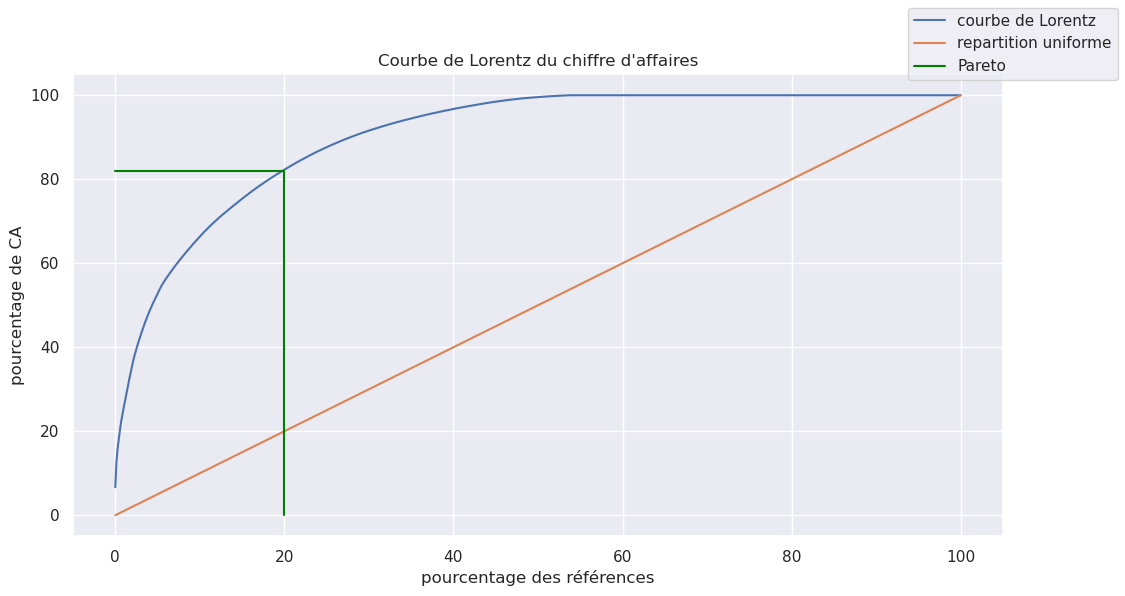

In [5]:

#creation objet pyplot figure et axe (en mode OOP)
sns.set_theme(style='darkgrid')

fig , ax = plt.subplots(1,1)

perso.courbe_Lorentz(    
    plt_ax=ax,
    df=data,
    colonne='CA',
    titre="Courbe de Lorentz du chiffre d'affaires",
    titreX="pourcentage des références",
    titreY="pourcentage de CA")

#agrandissement figure
fig.set_size_inches(12, 6)

#segments pour representer le pareto
ax.plot([0,20,20],[82,82,0],c='green')

#une petite legende pour mieux se reperer
fig.legend(["courbe de Lorentz", "repartition uniforme",'Pareto'])

#affichage du graphe
plt.show()

del fig,ax

 On peut voir un pareto 20% des références produisent 82% du chiffre d'affaires.<br>
 On peut aussi voir que quasiment 50% des références ne produisent rien.<br>
 Je conseille de vérifier les prix de ces vins même s'ils ne sont pas forcement en outliers,<br>
 surtout si on a du stock de ces vins (voir fin du notebook).

### Chiffre d'affaires réalisé en ligne

In [6]:
dataweb = data[data['onsale_web'] ==1]
print(round(dataweb['CA'].sum(),2),"euros de chiffre d'affaires web")

#nettoyage memoire
del dataweb

70568.6 euros de chiffre d'affaires web


### Recherche des valeurs aberrantes

### Analyse graphique des valeurs aberrantes

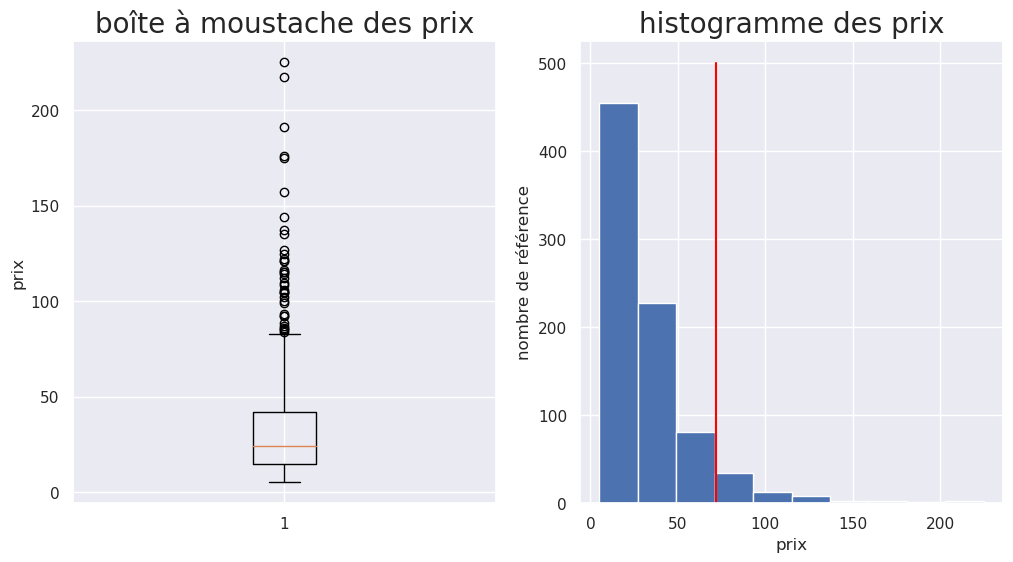

In [7]:
#theme visuel du graphe
sns.set_theme(style='darkgrid')

#creation objet pyplot figure et axe (en mode OOP)
fig , ax = plt.subplots(1,2)

#agrandissement taille figure
fig.set_size_inches(12, 6)

#creation d'une boite à moustache
ax[0].boxplot(data['price']) 
ax[0].set_title('boîte à moustache des prix',fontsize=20)
ax[0].set_ylabel('prix')

# creation d'un histogramme
ax[1].hist(data['price'])
ax[1].set_title('histogramme des prix',fontsize=20)
ax[1].plot([72,72],[500,0],c='red')
ax[1].set_xlabel('prix')
ax[1].set_ylabel('nombre de référence')
    
#pas utile sur jupyter mais j'aime bien
plt.show()

#nettoyage memoire:
del fig,ax

On peut voir des outliers au dessus de 72 €

### Analyse des outliers
méthode "maison"

In [8]:
#dataframe ou tableaux avec valeur abérrante en sortie

data['score'] = (data['price']-data['price'].mean())/data['price'].std()
display(data[abs(data['score'])>ecart_significatif][['product_id','price','CA','post_name']]
        .sort_values(by='price',ascending=False).head(15))

,product_id,price,CA,post_name
291,4352,225.0,1125.0,champagne-egly-ouriet-grand-cru-millesime-2008
525,5001,217.5,0.0,david-duband-charmes-chambertin-grand-cru-2014
692,5892,191.3,573.9,coteaux-champenois-egly-ouriet-ambonnay-rouge-...
310,4402,176.0,2288.0,cognac-frapin-vip-xo
657,5767,175.0,0.0,camille-giroud-clos-de-vougeot-2016
313,4406,157.0,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans
30,4594,144.0,NaN,post_name_vide
478,4904,137.0,685.0,domaine-des-croix-corton-charlemagne-grand-cru...
752,6126,135.0,270.0,champagne-gosset-celebris-vintage-2007
293,4355,126.5,1391.5,champagne-egly-ouriet-grand-cru-brut-blanc-de-...


méthode avec la bibliothèque sklearn

In [9]:
#même chose que précédemment avec la bibliothèque sklearn
sc = StandardScaler() #création d'un objet StandartScaler
data['score2'] = sc.fit_transform(data[['price']])
display(data[abs(data['score2'])>ecart_significatif][['product_id','price','CA','post_name']]
        .sort_values(by='price',ascending=False).head(15))

,product_id,price,CA,post_name
291,4352,225.0,1125.0,champagne-egly-ouriet-grand-cru-millesime-2008
525,5001,217.5,0.0,david-duband-charmes-chambertin-grand-cru-2014
692,5892,191.3,573.9,coteaux-champenois-egly-ouriet-ambonnay-rouge-...
310,4402,176.0,2288.0,cognac-frapin-vip-xo
657,5767,175.0,0.0,camille-giroud-clos-de-vougeot-2016
313,4406,157.0,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans
30,4594,144.0,NaN,post_name_vide
478,4904,137.0,685.0,domaine-des-croix-corton-charlemagne-grand-cru...
752,6126,135.0,270.0,champagne-gosset-celebris-vintage-2007
293,4355,126.5,1391.5,champagne-egly-ouriet-grand-cru-brut-blanc-de-...


avec cette analyse des prix de base , on s'apercoit que les outliers sont en fait des champagnes, des cognacs ,... 

In [10]:
#plus besoin des scores elimination des colonnes
data = data.drop(columns='score')
data = data.drop(columns='score2')

##### pour diminuer le boulot, je propose une classification des vins en fonction de leur type (vin, champagne,etc)

In [11]:
# pour information :
help(perso.categoriser)

Help on function categoriser in module fonction.fonction_perso:

categoriser(data, nom_col_recherche, mot_cle, nom_categorie, nom_col_categorie='categorie', regex=False)
    recherche un mot dans une string et enregistre un nom de categorie dans la colonne categorie (par defaut)
    Args:
        data : dataframe a categoriser as DataFrame
        nom_col_recherche : colonne où rechercher as string
        nom_categorie : nom de la catégorie as string
        nom_col_categorie : nom de la colonne cat"egorie a créer as string
    Returns :
        None



In [12]:
#creation d'une colonne data avec valeurs par defaut 'vin'
data['categorie'] = 'vin'

#creation d'un dictionnaire avec les mot recherchés et leurs categories
dic_categorie = {'grand-cru':'grand-cru',
                 'champagne':'champagne',
                 '1er-cru':'1er-cru',
                 '1cru':'1er-cru',
                 '1ercru':'1er-cru',
                 'clos':'clos',
                 'cognac':'cognac',
                 'whisky':'whisky',
                 'eau-de-vie':'eau-de-vie',
                 'cadeau':'cadeau'
                }

#changer la categorie en fonction d'un mot contenu dans la chaine de caractere
for cle,cat in dic_categorie.items():
    perso.categoriser(data,'post_name',cle,cat,regex=False)

#affichage des categories trouvées
#for cat in data['categorie'].unique():
#    display(data[data['categorie'] == cat])
    
#plus besoin du dictionnaire: effacement en memoire
del dic_categorie

#### Affichage graphique des prix aberrants en fonction des categories de vins (3 methodes)
méthode avec pandas hist()

/tmp/ipykernel_7043/841595405.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data.assign(index=data.groupby('categorie').cumcount()).pivot(


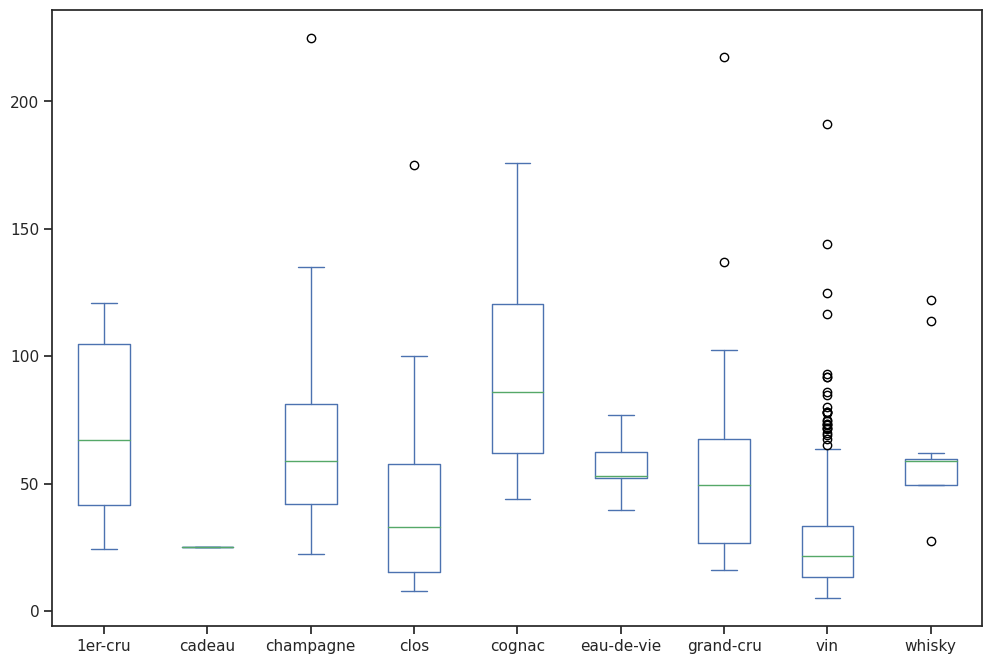

In [13]:
#methode pandas "pur"

#instruction trouvé la : https://stackoverflow.com/questions/48712274/matplotlib-box-plot-for-each-category

#theme ticks
sns.set_theme(style='ticks')

#affichage avec la methode hist de pandas
data.assign(index=data.groupby('categorie').cumcount()).pivot(
    'index','categorie','price').plot(kind='box',
                                     figsize=(12,8));

méthode avec matplotlib

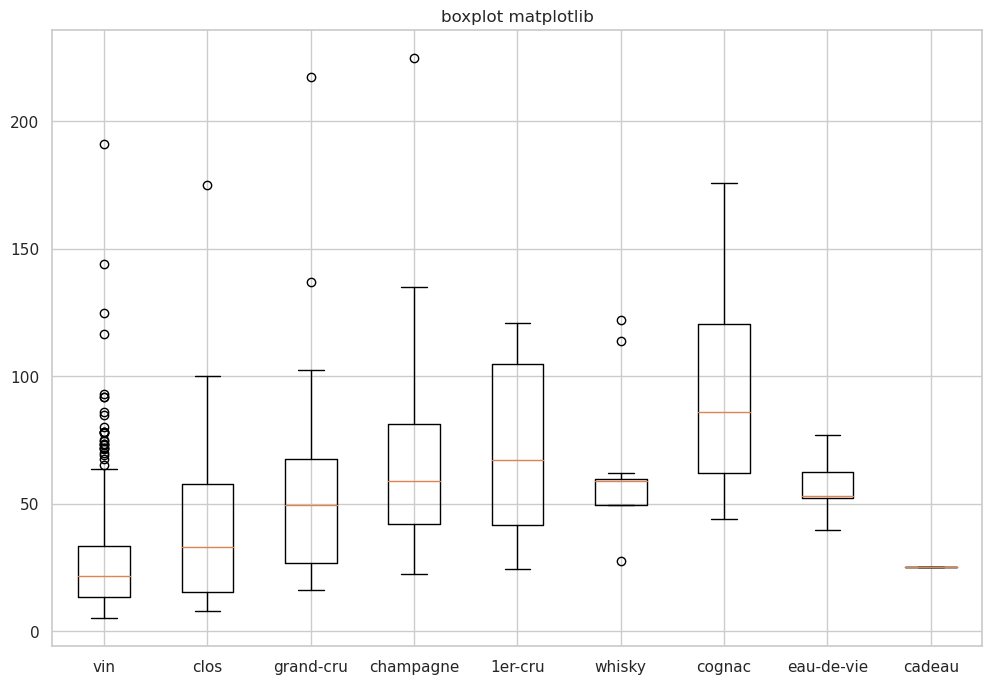

In [14]:
#methode avec matplotlib

#création figure matplotlib
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots()
#modification tailles graphique
fig.set_size_inches(12, 8)
#titre du graphique
ax.set_title('boxplot matplotlib')


#création des datas pour matplotlib
databoxplot =[]
listebox=[]

for cat in data['categorie'].unique().tolist():
    databoxplot.append(data[data['categorie']==cat]['price'])
    listebox.append(cat)    

#affichage du graphe 
ax.boxplot(databoxplot,labels=listebox)

#affichage de la fenetre du graphique
plt.show()

#nettoyage memoire
del databoxplot,listebox,fig,ax

méthode avec Seaborn

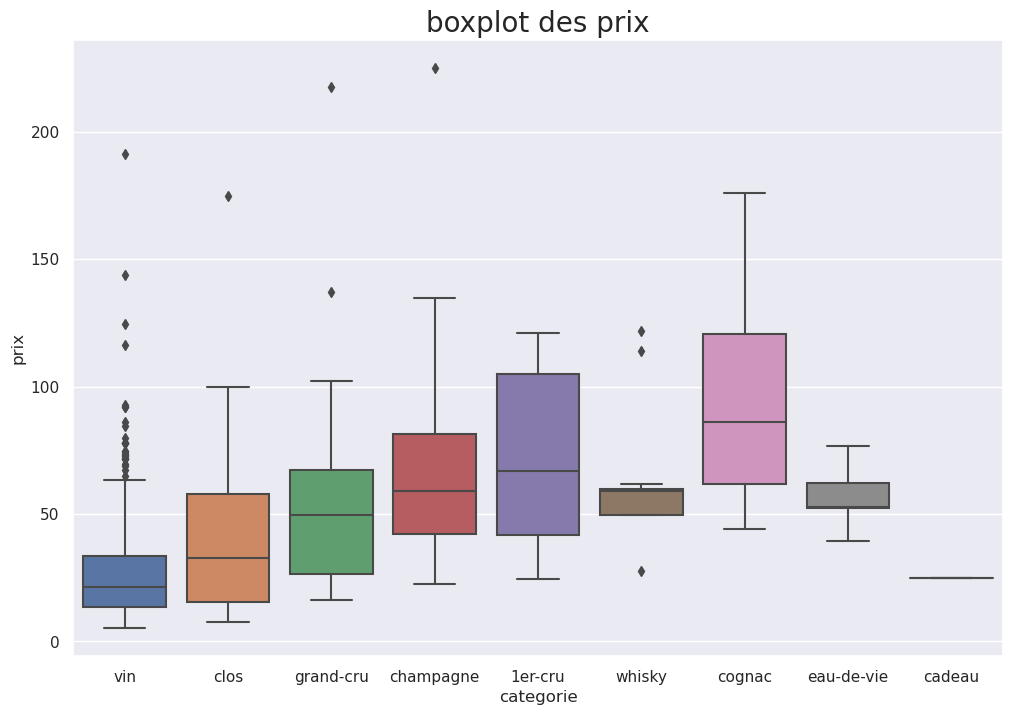

In [15]:
# methode avec seaborn
#theme de la figure
sns.set_theme(style='darkgrid')

#creation d'objet matplotlib
fig , ax = plt.subplots(1,1)

#agrandissement figure
fig.set_size_inches(12, 8)

#creation du graphe avec seaborn
ax.set_title('boxplot des prix',fontsize=20)
sns.boxplot(x="categorie", y="price", data=data, ax=ax)
ax.set_ylabel('prix')

#affichage fenetre
plt.show()

#nettoyage memoire
del fig,ax

#### Affichage graphique des ventes aberrantes

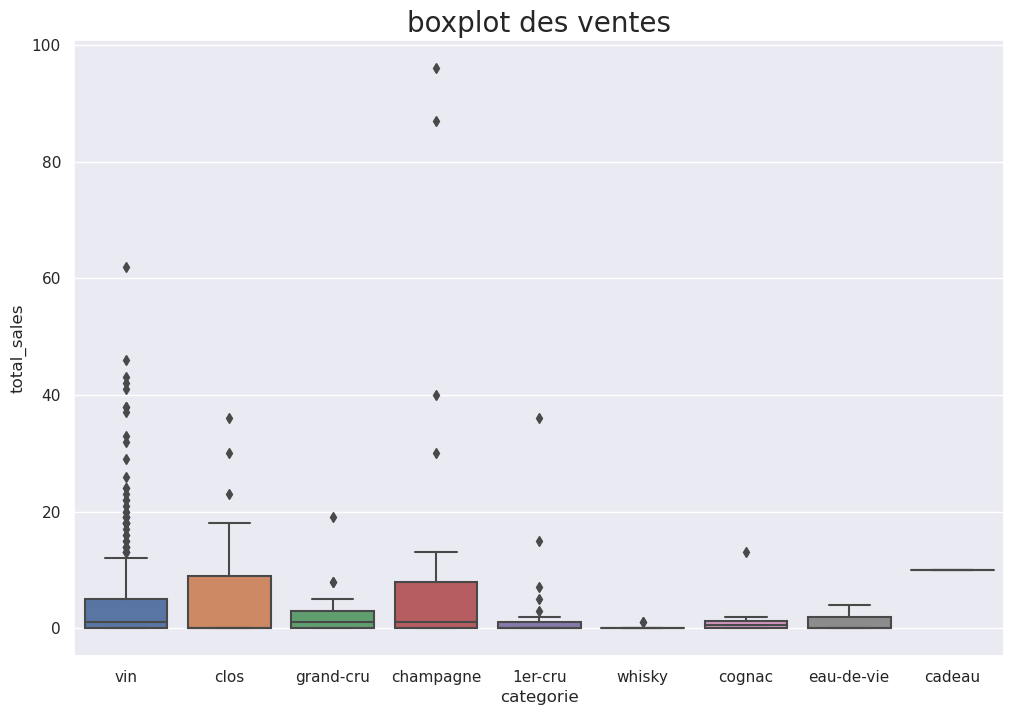

In [16]:
# methode avec seaborn
#theme de la figure
sns.set_theme(style='darkgrid')

#creation d'objet matplotlib
fig , ax = plt.subplots(1,1)

#agrandissement figure
fig.set_size_inches(12, 8)

#creation du graphe avec seaborn
ax.set_title('boxplot des ventes',fontsize=20)
ax = sns.boxplot(x="categorie", y="total_sales", data=data)

#affichage fenetre
plt.show()

#nettoyage memoire
del fig,ax

#### affichage des ventes sans les ventes nulles

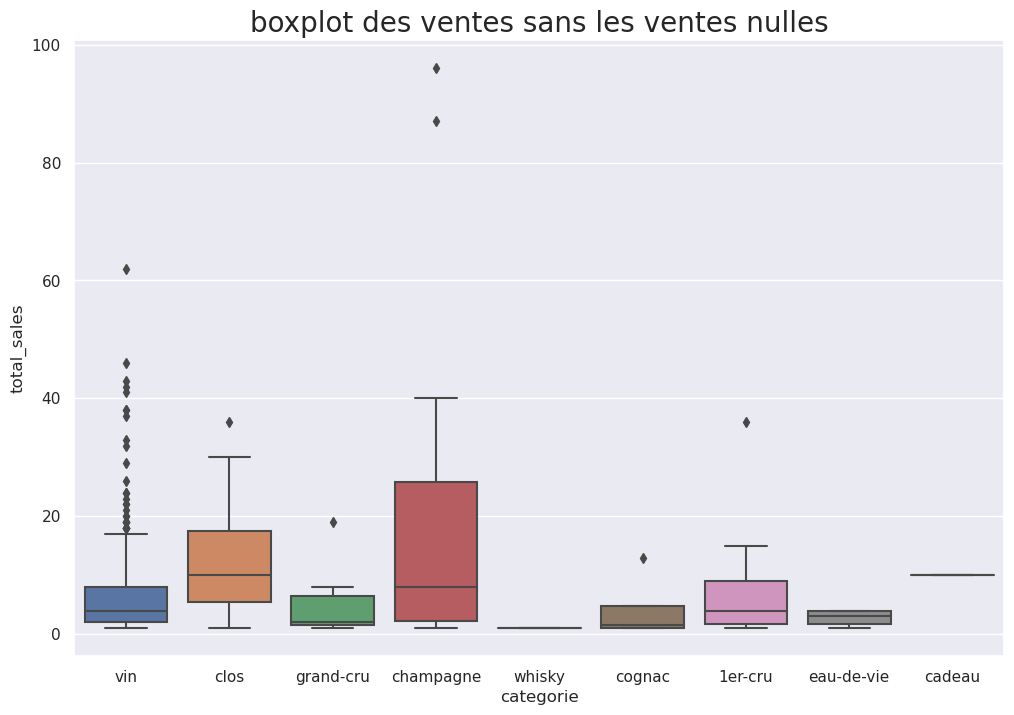

In [17]:
#enlevé les valeurs NaN
datatemp = data[~data['total_sales'].isna()]
#enlevé les valeurs nulles
datatemp = data[data['total_sales']!=0]

# methode avec seaborn
#theme de la figure
sns.set_theme(style='darkgrid')

#creation d'objet matplotlib
fig , ax = plt.subplots(1,1)

#agrandissement figure
fig.set_size_inches(12, 8)

#creation du graphe avec seaborn
ax.set_title('boxplot des ventes sans les ventes nulles',fontsize=20)
ax = sns.boxplot(x="categorie", y="total_sales", data=datatemp)

#affichage fenetre
plt.show()

#nettoyage memoire
del fig,ax,datatemp

#### détection des valeurs aberrantes en fonction des categories

In [18]:
#calcul de l'ecart à la moyenne en écart type
for cat in data['categorie'].unique().tolist():
    #creation d'un data temporaire
    datatemp = data[data['categorie'] == cat].copy(deep=True)
    #calcul de l'indice par rapport à l'écart type
    datatemp['score'] = sc.fit_transform(datatemp[['price']])
    #affichage
    print(" valeur du prix aberrante dans la categorie",cat)
    display(datatemp[abs(datatemp['score'])>ecart_significatif]
            [['product_id','price','total_sales','stock_quantity','post_name']]
            .sort_values(by='price',ascending=False))
    
#effacement du datatemp
del datatemp

 valeur du prix aberrante dans la categorie vin


,product_id,price,total_sales,stock_quantity,post_name
692,5892,191.3,3.0,10,coteaux-champenois-egly-ouriet-ambonnay-rouge-...
30,4594,144.0,NaN,0,post_name_vide
615,5612,124.8,0.0,12,domaine-weinbach-gewurztraminer-gc-furstentum-...
758,6202,116.4,0.0,14,domaine-clerget-echezeaux-en-orveaux-2015
707,5916,93.0,0.0,3,wemyss-malts-single-cask-chocolate-moka-cake
55,6324,92.0,NaN,18,post_name_vide
605,5565,92.0,0.0,0,tempier-bandol-cabassaou-2017
19,4055,86.1,NaN,0,post_name_vide
47,5070,84.7,NaN,0,post_name_vide
10,4046,80.0,6.0,0,pierre-gaillard-cote-rotie-rose-pourpre-2017


 valeur du prix aberrante dans la categorie clos


,product_id,price,total_sales,stock_quantity,post_name
657,5767,175.0,0.0,12,camille-giroud-clos-de-vougeot-2016


 valeur du prix aberrante dans la categorie grand-cru


,product_id,price,total_sales,stock_quantity,post_name
525,5001,217.5,0.0,20,david-duband-charmes-chambertin-grand-cru-2014


 valeur du prix aberrante dans la categorie champagne


,product_id,price,total_sales,stock_quantity,post_name
291,4352,225.0,5.0,0,champagne-egly-ouriet-grand-cru-millesime-2008


 valeur du prix aberrante dans la categorie 1er-cru


,product_id,price,total_sales,stock_quantity,post_name


 valeur du prix aberrante dans la categorie whisky


,product_id,price,total_sales,stock_quantity,post_name
708,5917,122.0,0.0,4,wemyss-malts-single-cask-scotch-whisky-choc-n-...
709,5918,114.0,0.0,8,wemyss-malts-single-cask-scotch-whisky-chai-ca...


 valeur du prix aberrante dans la categorie cognac


,product_id,price,total_sales,stock_quantity,post_name


 valeur du prix aberrante dans la categorie eau-de-vie


,product_id,price,total_sales,stock_quantity,post_name
352,4631,76.8,0.0,3,marcel-windholtz-eau-de-vie-de-baie-de-houx


 valeur du prix aberrante dans la categorie cadeau


,product_id,price,total_sales,stock_quantity,post_name


<a id='vente_nulle'></a>
#### affichage des ventes nulles par catégorie

In [19]:
#affichage des ventes nulle par catégorie
for cat in data['categorie'].unique().tolist():
    #creation d'un data temporaire
    datatemp = data[data['categorie'] == cat].copy(deep=True)
    #affichage
    print("référence sans vente dans la categorie",cat)
    display(datatemp[datatemp['total_sales']==0]
            [['product_id','price','total_sales','stock_quantity','post_name']]
            .sort_values(by='total_sales',ascending=False))
    
#effacement du datatemp
del datatemp

référence sans vente dans la categorie vin


,product_id,price,total_sales,stock_quantity,post_name
1,3849,34.3,0.0,0,pierre-jean-villa-saint-joseph-tilde-2017
656,5766,35.6,0.0,30,camille-giroud-auxey-duresses-blc-2017
624,5629,10.3,0.0,51,pares-balta-cava-brut-nature
626,5690,44.6,0.0,8,domaine-hauvette-igp-alpilles-dolia-2012
630,5696,17.5,0.0,35,planeta-sicilia-etna-bianco-2018
...,...,...,...,...,...
421,4733,16.8,0.0,13,camin-larredya-jurancon-sec-la-part-davant-2018
423,4739,7.4,0.0,50,jean-paul-brun-beaujolais-le-ronsay-2016
424,4740,9.7,0.0,8,jean-paul-brun-beaujolais-lancien-2016
426,4748,14.5,0.0,14,jean-paul-brun-saint-amour-2017


référence sans vente dans la categorie clos


,product_id,price,total_sales,stock_quantity,post_name
154,4115,100.0,0.0,11,zind-humbrecht-riesling-gc-rangen-thann-clos-s...
156,4132,88.4,0.0,5,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...
795,6618,13.5,0.0,2,clos-du-mont-olivet-vins-de-pays-du-gard-confl...
792,6615,32.8,0.0,8,clos-du-mont-olivet-chateauneuf-du-pape-2018
742,6095,29.8,0.0,3,chateau-de-villeneuve-saumur-champigny-grand-c...
729,5969,69.0,0.0,0,zind-humbrecht-riesling-clos-windsbuhl-2014
719,5956,17.2,0.0,12,clos-du-prieur-terrasses-du-larzac-2018
661,5771,38.4,0.0,3,camille-giroud-santenay-rge-1er-cru-clos-rouss...
657,5767,175.0,0.0,12,camille-giroud-clos-de-vougeot-2016
608,5573,34.7,0.0,5,domaine-huet-vouvray-le-clos-du-bourg-demi-sec...


référence sans vente dans la categorie grand-cru


,product_id,price,total_sales,stock_quantity,post_name
449,4793,18.7,0.0,17,maurice-schoech-pinot-gris-grand-cru-schlossbe...
450,4794,41.6,0.0,0,maurice-schoech-riesling-grand-cru-rangen-de-t...
477,4903,102.3,0.0,20,domaine-des-croix-corton-grand-cru-les-greves-...
525,5001,217.5,0.0,20,david-duband-charmes-chambertin-grand-cru-2014
621,5618,71.3,0.0,31,albert-boxler-riesling-grand-cru-sommerberg-d-...
622,5619,71.3,0.0,13,albert-boxler-riesling-grand-cru-sommerberg-e-...
684,5818,63.5,0.0,19,maison-trimbach-riesling-grand-cru-schlossberg...
816,6920,50.5,0.0,1,jean-faure-saint-emilion-grand-cru-2015


référence sans vente dans la categorie champagne


,product_id,price,total_sales,stock_quantity,post_name
163,4146,29.5,0.0,33,champagne-mailly-gc-brut-reserve
165,4148,37.5,0.0,18,champagne-mailly-grand-cru-brut-rose
166,4149,69.0,0.0,34,champagne-mailly-grand-cru-intemporelle-rose-2009
288,4337,83.0,0.0,13,champagne-mailly-grand-cru-les-echansons-2007
289,4348,59.0,0.0,21,champagne-egly-ouriet-tradition-grand-cru
290,4350,79.5,0.0,20,champagne-egly-ouriet-extra-brut-vp
295,4357,39.0,0.0,0,champagne-larmandier-bernier-latitude
296,4358,77.0,0.0,0,champagne-larmandier-bernier-vieilles-vignes-l...
514,4970,49.5,0.0,0,champagne-larmandier-bernier-terre-de-vertus-p...
537,5024,45.0,0.0,0,champagne-agrapart-fils-les-7-crus-brut-blanc-...


référence sans vente dans la categorie 1er-cru


,product_id,price,total_sales,stock_quantity,post_name
218,4210,79.8,0.0,0,lucien-boillot-nuits-saint-georges-1ercru-prul...
592,5544,61.6,0.0,0,marc-colin-et-fils-chassagne-montrachet-blanc-...
777,6299,78.0,0.0,10,lucien-boillot-gevrey-chambertin-1er-cru-les-c...
767,6216,121.0,0.0,6,domaine-des-comtes-lafon-volnay-1er-cru-champa...
766,6215,115.0,0.0,4,domaine-des-comtes-lafon-volnay-1er-cru-champa...
765,6214,99.0,0.0,7,domaine-des-comtes-lafon-volnay-1er-cru-champa...
764,6213,121.0,0.0,7,domaine-des-comtes-lafon-volnay-1er-cru-santen...
757,6201,105.6,0.0,7,david-duband-chambolle-musigny-1er-cru-les-sen...
739,6073,24.5,0.0,19,jacqueson-rully-rouge-1er-cru-les-preaux-2018
610,5580,83.7,0.0,18,lucien-boillot-puligny-montrachet-1er-cru-les-...


référence sans vente dans la categorie whisky


,product_id,price,total_sales,stock_quantity,post_name
299,4391,49.5,0.0,7,whisky-wemyss-peat-chimney
300,4392,49.5,0.0,13,whisky-wemyss-spice-king
301,4393,57.0,0.0,2,whisky-wemyss-vanilla-burst
302,4394,59.8,0.0,0,whisky-wemyss-treacle-chest
303,4395,27.5,0.0,8,whisky-lord-elcho
304,4396,62.0,0.0,7,whisky-wemyss-the-hive-12-ans
305,4397,59.0,0.0,7,whisky-wemyss-the-hive-batch-strength
306,4398,59.0,0.0,0,whisky-wemyss-peat-chimney-batch-strength
704,5912,57.0,0.0,8,whisky-kingsbarns-lowland-single-malt
708,5917,122.0,0.0,4,wemyss-malts-single-cask-scotch-whisky-choc-n-...


référence sans vente dans la categorie cognac


,product_id,price,total_sales,stock_quantity,post_name
308,4400,44.0,0.0,0,cognac-frapin-1270
312,4405,68.1,0.0,6,cognac-frapin-chateau-de-fontpinot-xo-1-2
313,4406,157.0,0.0,3,cognac-frapin-chateau-de-fontpinot-1989-20-ans
713,5932,59.9,0.0,3,cognac-normandin-mercier-vfc


référence sans vente dans la categorie eau-de-vie


,product_id,price,total_sales,stock_quantity,post_name
346,4625,52.4,0.0,3,marcel-windholtz-eau-de-vie-de-sureau
347,4626,52.9,0.0,2,marcel-windholtz-eau-de-vie-de-sureau-copie
349,4628,39.6,0.0,2,marcel-windholtz-eau-de-vie-de-marc-de-muscat
352,4631,76.8,0.0,3,marcel-windholtz-eau-de-vie-de-baie-de-houx
356,4635,62.4,0.0,3,marcel-windholtz-eau-de-vie-de-kirsch-dalsace-...


référence sans vente dans la categorie cadeau


,product_id,price,total_sales,stock_quantity,post_name


#### Affichage des ventes abérrantes

In [20]:
#calcul de l'ecart à la moyenne en écart type
#enlevé les valeurs NaN
data = data[~data['total_sales'].isna()]
#enlevé les valeurs nulles
data = data[data['total_sales']!=0]

for cat in data['categorie'].unique().tolist():
    #création d'un dataframe temporaire
    datatemp = data[data['categorie'] == cat].copy(deep=True)
    #calcul de l'indice par rapport à l'écart type
    datatemp['score'] = sc.fit_transform(datatemp[['total_sales']])
    
    #affichage
    print(" valeur des ventes aberrantes dans la categorie",cat)
    display(datatemp[abs(datatemp['score'])>ecart_significatif]
            [['product_id','price','total_sales','stock_quantity','post_name']]
            .sort_values(by='total_sales',ascending=False))
    
#effacement du datatemp
del datatemp

 valeur des ventes aberrantes dans la categorie vin


,product_id,price,total_sales,stock_quantity,post_name
121,4068,16.6,62.0,157,gilles-robin-crozes-hermitage-papillon-2019
210,4200,5.8,46.0,190,moulin-de-gassac-igp-pays-dherault-guilhem-ros...
188,4172,5.7,43.0,167,maurel-pays-oc-chardonnay-2019
200,4187,13.3,42.0,90,le-pas-de-lescalette-languedoc-petits-pas-2019
761,6206,25.2,41.0,120,domaine-giudicelli-patrimonio-blanc-2019
734,6047,10.9,38.0,46,chateau-de-la-liquiere-faugeres-ampoule-2019
418,4729,8.6,38.0,151,emile-boeckel-cremant-brut-blanc-de-blancs
762,6207,25.2,37.0,363,domaine-giudicelli-patrimonio-rouge-2016
463,4870,9.3,33.0,0,triennes-igp-mediterranee-rose-2019
398,4706,16.8,32.0,23,albert-mann-muscat-2018


 valeur des ventes aberrantes dans la categorie clos


,product_id,price,total_sales,stock_quantity,post_name
170,4153,29.0,36.0,0,elian-daros-cotes-du-marmandais-clos-baquey-2015


 valeur des ventes aberrantes dans la categorie grand-cru


,product_id,price,total_sales,stock_quantity,post_name
448,4792,21.0,19.0,13,maurice-schoech-riesling-grand-cru-kaefferkopf...


 valeur des ventes aberrantes dans la categorie champagne


,product_id,price,total_sales,stock_quantity,post_name
286,4334,49.0,96.0,0,champagne-gosset-grand-blanc-de-blanc
162,4144,49.0,87.0,11,champagne-gosset-grand-rose


 valeur des ventes aberrantes dans la categorie whisky


,product_id,price,total_sales,stock_quantity,post_name


 valeur des ventes aberrantes dans la categorie cognac


,product_id,price,total_sales,stock_quantity,post_name


 valeur des ventes aberrantes dans la categorie 1er-cru


,product_id,price,total_sales,stock_quantity,post_name
470,4891,27.9,36.0,0,jacqueson-rully-blanc-1er-cru-la-pucelle-2018


 valeur des ventes aberrantes dans la categorie eau-de-vie


,product_id,price,total_sales,stock_quantity,post_name


 valeur des ventes aberrantes dans la categorie cadeau


,product_id,price,total_sales,stock_quantity,post_name


In [21]:
help(perso)

Help on module fonction.fonction_perso in fonction:

NAME
    fonction.fonction_perso

FUNCTIONS
    analyseDataFrame(df)
        affiche un resumé des Dataframes info describe head et verification doublons
        
        Args:
            df : dataframe à analyser as dataFrame
        
        Returns:
            None
    
    categoriser(data, nom_col_recherche, mot_cle, nom_categorie, nom_col_categorie='categorie', regex=False)
        recherche un mot dans une string et enregistre un nom de categorie dans la colonne categorie (par defaut)
        Args:
            data : dataframe a categoriser as DataFrame
            nom_col_recherche : colonne où rechercher as string
            nom_categorie : nom de la catégorie as string
            nom_col_categorie : nom de la colonne cat"egorie a créer as string
        Returns :
            None
    
    courbe_Lorentz(plt_ax, df, colonne, titre='', titreX='', titreY='')
        configure une courbe de Lorentz sur l'axe matplotlib
    

### Conclusion :
[20% des références produisent 80%](#lorentz) du chiffre d'affaires<br>
Certaines références ne se [vendent pas](#vente_nulle), à cause du prix? une autre raison?<br>
Des références à bas prix ne se vendent pas et prennent de la place en stock, faire des promotions?<br>
Il faudrait avoir plus d'informations sur certains vins (sku et postname vide) pour pouvoir les classer et les vérifier.<br>
Il faudrait aussi avoir l'avis d'un(e) spécialiste pour savoir s'il ne faudrait pas d'autres catégories, classer différemment les vins.<br>
Il faut aussi un connaisseur pour vérifier les prix des différents outliers trouvés<br>
#### Pour la gestion des stocks:
Une erreur dans les données est à rectifier entre le stock disponible et l'état du stock (trouvé dans les analyses préparatoires)<br>
Des [stocks de produits sont à 0](#stock_a_0), y compris sur des produits générants un fort chiffre d'affaires.<br> 
Voir pour instaurer une politique de gestion de stock (stock minimal, stock de sécurité) sur certains produits.